In [1]:
#### DATA GENERAL INFORMATION
# The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

# sex: 1 for female and 2 for male.
# age: of the patient.
# classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
# degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
# patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
# pneumonia: whether the patient already have air sacs inflammation or not.
# pregnancy: whether the patient is pregnant or not.
# diabetes: whether the patient has diabetes or not.
# copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
# asthma: whether the patient has asthma or not.
# inmsupr: whether the patient is immunosuppressed or not.
# hypertension: whether the patient has hypertension or not.
# cardiovascular: whether the patient has heart or blood vessels related disease.
# renal chronic: whether the patient has chronic renal disease or not.
# other disease: whether the patient has other disease or not.
# obesity: whether the patient is obese or not.
# tobacco: whether the patient is a tobacco user.
# usmr: Indicates whether the patient treated medical units of the first, second or third level.
# medical unit: type of institution of the National Health System that provided the care.
# intubed: whether the patient was connected to the ventilator.
# icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
# date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.
#### GOAL
# predict probability if a person needs to be hospitalized or not.
# predict probability if a person is going to die or not.
# predict probability if a person is going to be intubated or not.
# predict probability if a person is going to be in the ICU or not.


In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the data
df = pd.read_csv('Covid Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [5]:
# check if there are duplicate rows
df.duplicated().sum()

812049

In [6]:
# there are more than 800k duplicates but we will keep them for now because we can not tell if they are real duplicates or not.
# since data doesn't have a key column.
# lets each column and see if there are balance and how many missing data we have.

In [7]:
df['SEX'].value_counts()
# since there aren't any 97 and 99 there is no missing data in this column.
# we switch the value from 2 to 0 to make it easier to work with.
df['SEX'] = df['SEX'].apply(lambda x: 0 if x==2 else 1)
df['SEX'].value_counts()

1    525064
0    523511
Name: SEX, dtype: int64

In [8]:
#1: returned home, 2: hospitalization
df['PATIENT_TYPE'].value_counts()

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

In [9]:
# switch 2 to 0
df['PATIENT_TYPE'] = df['PATIENT_TYPE'].apply(lambda x: 0 if x==2 else 1)
df['PATIENT_TYPE'].value_counts()

1    848544
0    200031
Name: PATIENT_TYPE, dtype: int64

In [10]:
# we ha ve to change it to if they died or not
df['DATE_DIED'].value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [11]:
df['DATE_DIED'] = df['DATE_DIED'].apply(lambda x: 0 if x=='9999-99-99' else 1)
df['DATE_DIED'].value_counts()

0    971633
1     76942
Name: DATE_DIED, dtype: int64

In [12]:
df['ICU'].value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [13]:
# lets get unknown values (97, 99) and assumed they have not been in ICU
df['ICU'] = df['ICU'].apply(lambda x: 1 if x==1 else 0)
df['ICU'].value_counts()

0    1031717
1      16858
Name: ICU, dtype: int64

In [14]:
df['INTUBED'].value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [15]:
df['INTUBED'] = df['INTUBED'].apply(lambda x: 1 if x==1 else 0)
df['INTUBED'].value_counts()

0    1014919
1      33656
Name: INTUBED, dtype: int64

In [16]:
df['PNEUMONIA'].value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [17]:
df['PNEUMONIA'] = df['PNEUMONIA'].apply(lambda x: 1 if x==1 else 0)
df['PNEUMONIA'].value_counts()

0    908537
1    140038
Name: PNEUMONIA, dtype: int64

In [18]:
df['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [19]:
df['PREGNANT'] = df['PREGNANT'].apply(lambda x: 1 if x==1 else 0)
df['PREGNANT'].value_counts()

0    1040444
1       8131
Name: PREGNANT, dtype: int64

In [20]:
df['DIABETES'].value_counts()

2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64

In [21]:
df['DIABETES'] = df['DIABETES'].apply(lambda x: 1 if x==1 else 0)
df['DIABETES'].value_counts()

0    923586
1    124989
Name: DIABETES, dtype: int64

In [22]:
df['COPD'].value_counts()

2     1030510
1       15062
98       3003
Name: COPD, dtype: int64

In [23]:
df['COPD'] = df['COPD'].apply(lambda x: 1 if x==1 else 0)
df['COPD'].value_counts()

0    1033513
1      15062
Name: COPD, dtype: int64

In [24]:
df['ASTHMA'].value_counts()

2     1014024
1       31572
98       2979
Name: ASTHMA, dtype: int64

In [25]:
df['ASTHMA'] = df['ASTHMA'].apply(lambda x: 1 if x==1 else 0)
df['ASTHMA'].value_counts()

0    1017003
1      31572
Name: ASTHMA, dtype: int64

In [26]:
df['INMSUPR'].value_counts()

2     1031001
1       14170
98       3404
Name: INMSUPR, dtype: int64

In [27]:
df['INMSUPR'] = df['INMSUPR'].apply(lambda x: 1 if x==1 else 0)
df['INMSUPR'].value_counts()

0    1034405
1      14170
Name: INMSUPR, dtype: int64

In [28]:
df['HIPERTENSION'].value_counts()

2     882742
1     162729
98      3104
Name: HIPERTENSION, dtype: int64

In [29]:
df['HIPERTENSION'] = df['HIPERTENSION'].apply(lambda x: 1 if x==1 else 0)
df['HIPERTENSION'].value_counts()

0    885846
1    162729
Name: HIPERTENSION, dtype: int64

In [30]:
df['OTHER_DISEASE'].value_counts()

2     1015490
1       28040
98       5045
Name: OTHER_DISEASE, dtype: int64

In [31]:
df['OTHER_DISEASE'] = df['OTHER_DISEASE'].apply(lambda x: 1 if x==1 else 0)
df['OTHER_DISEASE'].value_counts()

0    1020535
1      28040
Name: OTHER_DISEASE, dtype: int64

In [32]:
df['CARDIOVASCULAR'].value_counts()

2     1024730
1       20769
98       3076
Name: CARDIOVASCULAR, dtype: int64

In [33]:
df['CARDIOVASCULAR'] = df['CARDIOVASCULAR'].apply(lambda x: 1 if x==1 else 0)
df['CARDIOVASCULAR'].value_counts()

0    1027806
1      20769
Name: CARDIOVASCULAR, dtype: int64

In [34]:
df['OBESITY'].value_counts()

2     885727
1     159816
98      3032
Name: OBESITY, dtype: int64

In [35]:
df['OBESITY'] = df['OBESITY'].apply(lambda x: 1 if x==1 else 0)
df['OBESITY'].value_counts()

0    888759
1    159816
Name: OBESITY, dtype: int64

In [36]:
# predicting if a patient needs hospitalization or not
# we will use random forest classifier to be able to provide explanation and also provide a probability of each outcome.
X = df[['PNEUMONIA','PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']].values
y = df['PATIENT_TYPE'].values


In [37]:
df_X = df[['PNEUMONIA','PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']]
type(df_X)

pandas.core.frame.DataFrame

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [39]:
# train the model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=13)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=13)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rfc.predict(X_test))
# 90% accuracy is really good but we need to check the confusion matrix to see if the model is predicting the right class.

0.899892711537086

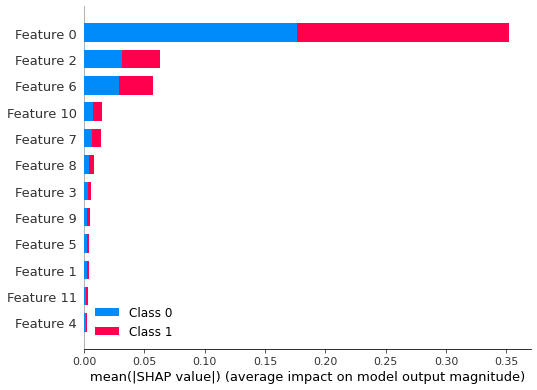

In [82]:
import shap
from sklearn.ensemble import RandomForestRegressor
# explain all the predictions in the test set
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test[:100,:])
shap.summary_plot(shap_values, X_test[:100,:])

In [95]:
# base on the results we can see that most effective variables in prediction of hospitalization are 
# PNEUMONIA, HIPERTENSION, and DIABETES


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, RFC.predict(X_test))
# it can be seen that fp rate is almost 20% however fn percent is around 10%
# this is due to enbalanceness of the data
# with under sampling this problem might be solved

array([[ 24204,  15959],
       [  5035, 164517]])

In [87]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test[:100,:])